In [1]:
# Modues to be used
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
# Load data from pickle files

# -> Player dictionary with the dataFrames
f = open('data/dict_player.pickle', 'rb')
dict_player = pickle.load(f)

# -> Map dataFrames
f = open('data/df_map.pickle','rb')
df_map = pickle.load(f)

# -> Map dictionary
f = open('data/dict_map.pickle','rb')
dict_map = pickle.load(f)

In [9]:
dict_player[player_id].head().keys()

Index(['map', 'date', 'team_id', 'team_name', 'player_id', 'player_name',
       'kills', 'hs_kills', 'assists', 'flash_assists', 'deaths', 'KAST',
       'kill_death_diff', 'ADR', 'first_kills_diff', 'rating',
       'kills_per_round', 'deaths_per_round', 'impact', 'team_score',
       'op_score', 'win', 'team_rank', 'prize'],
      dtype='object')

In [3]:
# First we take all the players in ranked teams from 2019
player_aux = {}

for player_id in dict_player:
    df_aux = dict_player[player_id][ dict_player[player_id]['date']>datetime(2019,1,1) ]

    if any( df_aux['team_rank']>0 ):
        player_aux[player_id] = {}

        prize = sum( df_aux['prize'] )
        if prize > 0.0:
            player_aux[player_id]['prize'] = np.log( prize ) / 12.0
        else:
            player_aux[player_id]['prize'] = 0.0

        player_aux[player_id]['rating']           = df_aux['rating'].mean()
        player_aux[player_id]['hs_perc']          = (df_aux['hs_kills']/df_aux['kills']).mean()
        player_aux[player_id]['kills_per_round']  = df_aux['kills_per_round'].mean()
        player_aux[player_id]['deaths_per_round'] = df_aux['deaths_per_round'].mean()
        player_aux[player_id]['ADR']              = df_aux['ADR'].mean()

        # print( df_aux['player_name'].unique() )


In [28]:
# Using Euclidean distance
player_id = 7998

df = pd.DataFrame.from_dict(player_aux,orient='index')

df.prize = (df.prize - df.prize.mean()) / df.prize.std()
df.rating = (df.rating - df.rating.mean()) / df.rating.std()
df.head()

for column in df:
    df[column] = (df[column] - df[column].mean()) / df[column].std()
    
df_dist = df
df_dist['dist'] = df['rating']*0.0
for column in df:
    df_dist[column] = (df[column]-df.loc[player_id][column])**2
    df_dist['dist'] = df_dist['dist'] + df_dist[column]



df_dist = df_dist.sort_values('dist',ascending=True)
for player_id in df_dist.index[:50]:
    print( dict_player[player_id].player_name.unique() )

df_dist.head()

['s1mple']
['ZywOo']
['Emy']
['INS']
['BnTeT']
['dexter']
['electronic']
['xeta']
['vsm']
['Benkai']
['splashske']
['floppy']
['yuurih']
['dezon']
['ropz']
['EliGE']
['NAF']
['erkaSt']
['d4v41']
['device']
['Kaze']
['huNter' 'huNter-']
['mantuu']
['Bubzkji']
['Brehze']
['refinnej']
['Magisk']
['adaro']
['rain']
['blameF']
['detinate']
['mitsuha']
['KSCERATO']
['Hatz']
['PTC']
['Infinite']
['GooseBreeder']
['mimi']
['hardzao']
['frozen']
['zorte']
['bENITA']
['meyern']
['Jamppi']
['decov9jse']
['allee']
['CAth']
['Tony']
['somedieyoung']
['poizon']


,prize,rating,hs_perc,kills_per_round,deaths_per_round,ADR,dist
7998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11893,0.022191,0.051147,0.232547,0.005181,0.000772,0.026647,0.229143
14401,0.149162,0.185793,0.178240,0.440385,0.428542,0.002703,3.835479
11140,0.409338,0.261034,0.034546,0.623615,0.161540,0.000151,4.441538
7131,0.098690,0.373684,0.030225,1.101629,0.018068,0.050536,5.596741


In [30]:
# Using Cosine Similarity
player_id = 7998

df = pd.DataFrame.from_dict(player_aux,orient='index')

df.prize = (df.prize - df.prize.mean()) / df.prize.std()
df.rating = (df.rating - df.rating.mean()) / df.rating.std()
df.head()

for column in df:
    df[column] = (df[column] - df[column].mean()) / df[column].std()
    
df_dist = df
df_dist['dist'] = df['rating']*0.0


#norm_y = 0.0
df_dist['norm_x'] = df_dist['dist']*0.0
for column in df:
    df_dist['norm_x'] = df_dist['norm_x'] + df_dist[column]**2

df_dist['norm_x'] = np.sqrt( df_dist['norm_x'] )


for column in df:
    df_dist[column] = df[column]*df_dist.loc[player_id][column] / (df_dist['norm_x']*df_dist.loc[player_id][column])
    df_dist['dist'] = df_dist['dist'] + df_dist[column]



df_dist = df_dist.sort_values('dist',ascending=False)
for player_id in df_dist.index[:50]:
    print( dict_player[player_id].player_name.unique() )

df_dist.head()

['StyroN']
['swede']
['droid']
['tb']
['VANITY']
['poem']
['Szejn']
['roca']
['Jsav']
['dispenser']
['leaf']
['Zeo']
['expro']
['makmuR']
['Christopher' 'christopher']
['hones']
['captainMo']
['kenzo']
['SzarvasMarha' 'crazyd33R']
['JonahP']
['matup']
['merisinho']
['M3lio' 'Melio']
['rugrat']
['Divine']
['zander']
['mizu']
['Blue']
['FaNg']
['Enemy']
['rood']
['paz']
['BOOBIE']
['RIKO']
['dzt']
['micr0']
['EXUS']
['HZ']
['retrQ']
['djay']
['Infernal']
['HellfightR']
['Mayker']
['bnwGiggs']
['Nurfed']
['ALLE']
['ZED']
['Temperature']
['robby']
['spy']


,prize,rating,hs_perc,kills_per_round,deaths_per_round,ADR,dist,norm_x
14356,0.698747,-0.293044,-0.140492,0.223946,0.041714,0.568442,13.075081,1.0
16281,0.162786,0.494459,0.563487,0.246424,0.282930,0.310165,9.142150,1.0
14495,0.335927,0.145203,-0.026162,0.415787,0.291105,0.640389,7.504780,1.0
839,0.717202,-0.252867,0.457184,-0.166530,0.246126,0.112482,6.919585,1.0
13510,0.196903,0.264130,0.169272,0.351396,0.434256,0.544583,6.800467,1.0


In [29]:
df_dist.head()

,prize,rating,hs_perc,kills_per_round,deaths_per_round,ADR,dist
7998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11893,0.022191,0.051147,0.232547,0.005181,0.000772,0.026647,0.229143
14401,0.149162,0.185793,0.178240,0.440385,0.428542,0.002703,3.835479
11140,0.409338,0.261034,0.034546,0.623615,0.161540,0.000151,4.441538
7131,0.098690,0.373684,0.030225,1.101629,0.018068,0.050536,5.596741


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f965ddc21d0>,
      dtype=object)

<Figure size 720x576 with 0 Axes>

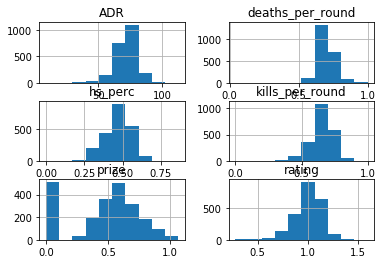

In [23]:
df_aux = pd.DataFrame.from_dict(player_aux,orient='index')
df_aux.hist()

In [19]:
df.head()

,prize,rating,hs_perc,kills_per_round,deaths_per_round,ADR,dist
39,0.054816,7.494980,0.330286,7.082623,2.607715,3.854354,918.041918
884,0.066726,7.815210,0.066810,8.979897,1.109049,4.609312,1025.773626
29,0.009232,2.285236,0.236277,1.813314,0.952606,1.172727,83.706060
7169,0.022191,4.317828,0.460286,5.101416,0.400722,4.239688,422.947085
629,0.654563,2.829870,1.700996,2.585658,2.377968,1.643616,278.134176


In [0]:
dict_player[13230]